# Recuperar la informacion de la base de datos

Librerias necesarias para la exportacion 

In [43]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


Configuracion para la base de datos

In [44]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "",
    "database": "importacion",
    "port": 3306
}


Variable con el parametro a ingresar

In [45]:
distrito_filtrar = "028-GUAYAQUIL - MARITIMO"
regimen_filtrar = "10-IMPORTACION A CONSUMO"

Conexion con la base de datos para obtener los datos

In [46]:
def obtener_datos_por_distrito(distrito,regimen):
    try:
        # Conexión a la base de datos
        conexion = pymysql.connect(**db_config)
        
        # Consulta SQL con filtro en DISTRITO
        consulta = """
        SELECT FEC_INGRESO, PAIS_ORIGEN, TIPO_UNIDAD_FISICA, TIPO_UNIDAD_COMERCIAL, PESO_NETO, FOB, FLETE, SEGURO, CIF, CANTIDAD_FISICA, CANTIDAD_COMERCIAL, FODINFA, IVA
        FROM Vista_Importacion
        WHERE DISTRITO = %s  AND REGIMEN = %s;
        """
        
        # Ejecutar la consulta
        df = pd.read_sql(consulta, conexion, params=(distrito,regimen,))
        
        # Mostrar resultados
        if not df.empty:
            print(f"Se encontraron {len(df)} registros para el distrito: {distrito}")
            print(df)
        else:
            print(f"No se encontraron registros para el distrito: {distrito}")
        
        return df

    except Exception as e:
        print(f"Error al recuperar los datos: {e}")
        return None
    finally:
        # Cerrar la conexión
        if 'conexion' in locals():
            conexion.close()

Inicio del programa 

In [47]:
if __name__ == "__main__":
    datos = obtener_datos_por_distrito(distrito_filtrar,regimen_filtrar)

C:\Users\Josue\AppData\Local\Temp\ipykernel_14024\2095416197.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(consulta, conexion, params=(distrito,regimen,))


Se encontraron 3965238 registros para el distrito: 028-GUAYAQUIL - MARITIMO
        FEC_INGRESO   PAIS_ORIGEN     TIPO_UNIDAD_FISICA  \
0        2024-07-10      CN-CHINA  11-NUMERO DE UNIDADES   
1        2024-07-17     TW-TAIWAN  11-NUMERO DE UNIDADES   
2        2024-07-18     TW-TAIWAN  11-NUMERO DE UNIDADES   
3        2024-07-09      CN-CHINA  11-NUMERO DE UNIDADES   
4        2024-07-11    TR-TURKIYE  11-NUMERO DE UNIDADES   
...             ...           ...                    ...   
3965233  2023-12-12     ES-ESPAÑA  11-NUMERO DE UNIDADES   
3965234  2023-12-28      CN-CHINA     31-KILOGRAMO BRUTO   
3965235  2023-12-26      JP-JAPON     31-KILOGRAMO BRUTO   
3965236  2023-12-27      CN-CHINA      82-METRO CUADRADO   
3965237  2023-08-23  HK-HONG KONG  11-NUMERO DE UNIDADES   

        TIPO_UNIDAD_COMERCIAL  PESO_NETO         FOB      FLETE   SEGURO  \
0                    U-UNIDAD   5856.900    8903.040   1184.250   82.067   
1                  PZA-PIEZAS  15408.300  253319.00

In [48]:
datos.head()

,FEC_INGRESO,PAIS_ORIGEN,TIPO_UNIDAD_FISICA,TIPO_UNIDAD_COMERCIAL,PESO_NETO,FOB,FLETE,SEGURO,CIF,CANTIDAD_FISICA,CANTIDAD_COMERCIAL,FODINFA,IVA
0,2024-07-10,CN-CHINA,11-NUMERO DE UNIDADES,U-UNIDAD,5856.900,8903.04,1184.250,82.067,10169.400,1552.0,1552.0,50.99,1763.52
1,2024-07-17,TW-TAIWAN,11-NUMERO DE UNIDADES,PZA-PIEZAS,15408.300,253319.00,17545.900,585.080,271450.000,17978.0,17978.0,1357.31,40921.20
2,2024-07-18,TW-TAIWAN,11-NUMERO DE UNIDADES,U-UNIDAD,333.041,3504.06,31.329,5.053,3540.440,582.0,582.0,17.71,560.29
3,2024-07-09,CN-CHINA,11-NUMERO DE UNIDADES,PZA-PIEZAS,226.140,1523.10,74.658,5.331,1603.090,230.0,230.0,8.02,241.66
4,2024-07-11,TR-TURKIYE,11-NUMERO DE UNIDADES,U-UNIDAD,3.768,76.10,0.000,0.223,76.323,4.0,4.0,0.39,35.16


In [49]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965238 entries, 0 to 3965237
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   FEC_INGRESO            object 
 1   PAIS_ORIGEN            object 
 2   TIPO_UNIDAD_FISICA     object 
 3   TIPO_UNIDAD_COMERCIAL  object 
 4   PESO_NETO              float64
 5   FOB                    float64
 6   FLETE                  float64
 7   SEGURO                 float64
 8   CIF                    float64
 9   CANTIDAD_FISICA        float64
 10  CANTIDAD_COMERCIAL     float64
 11  FODINFA                float64
 12  IVA                    float64
dtypes: float64(9), object(4)
memory usage: 393.3+ MB
None


In [50]:
print(datos.describe())

          PESO_NETO           FOB         FLETE        SEGURO           CIF  \
count  3.965238e+06  3.965238e+06  3.965238e+06  3.965238e+06  3.965238e+06   
mean   2.138411e+04  2.459561e+04  6.042294e+02  1.134539e+02  2.531329e+04   
std    6.725558e+05  4.798545e+05  4.730800e+03  1.723898e+04  4.851212e+05   
min    1.000000e-03  1.000000e-03  0.000000e+00  0.000000e+00  1.000000e-03   
25%    1.423625e+01  2.195000e+02  0.000000e+00  5.200000e-01  2.367353e+02   
50%    1.268690e+02  1.301305e+03  1.019000e+01  3.750000e+00  1.390625e+03   
75%    1.316115e+03  9.220747e+03  1.189528e+02  2.500100e+01  9.762965e+03   
max    2.153460e+08  1.570250e+08  1.598950e+06  2.498140e+07  1.585950e+08   

       CANTIDAD_FISICA  CANTIDAD_COMERCIAL       FODINFA           IVA  
count     3.965238e+06        3.965238e+06  3.965238e+06  3.965238e+06  
mean      3.446575e+04        1.340554e+04  1.033722e+02  2.046528e+03  
std       3.777640e+06        2.100860e+06  7.157091e+02  1.145173e+0

C:\Users\Josue\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


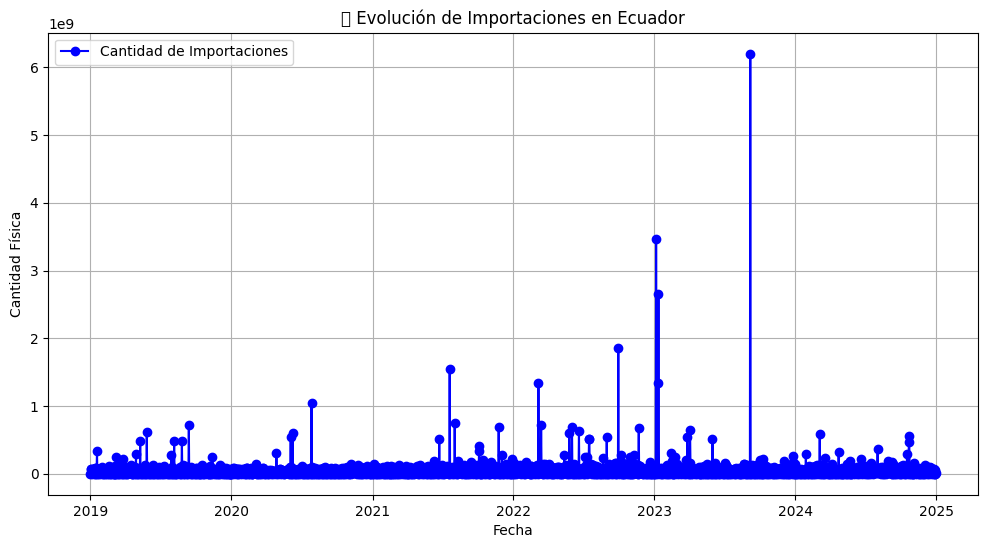

In [51]:

datos['FEC_INGRESO'] = pd.to_datetime(datos['FEC_INGRESO'])


importaciones_por_fecha = datos.groupby('FEC_INGRESO')['CANTIDAD_FISICA'].sum()

plt.figure(figsize=(12, 6))
plt.plot(importaciones_por_fecha, marker='o', linestyle='-', color='b', label="Cantidad de Importaciones")
plt.title("📦 Evolución de Importaciones en Ecuador")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Física")
plt.legend()
plt.grid()
plt.show()


C:\Users\Josue\AppData\Local\Temp\ipykernel_14024\2552981339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.index, y=top_paises.values, palette="viridis")
C:\Users\Josue\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


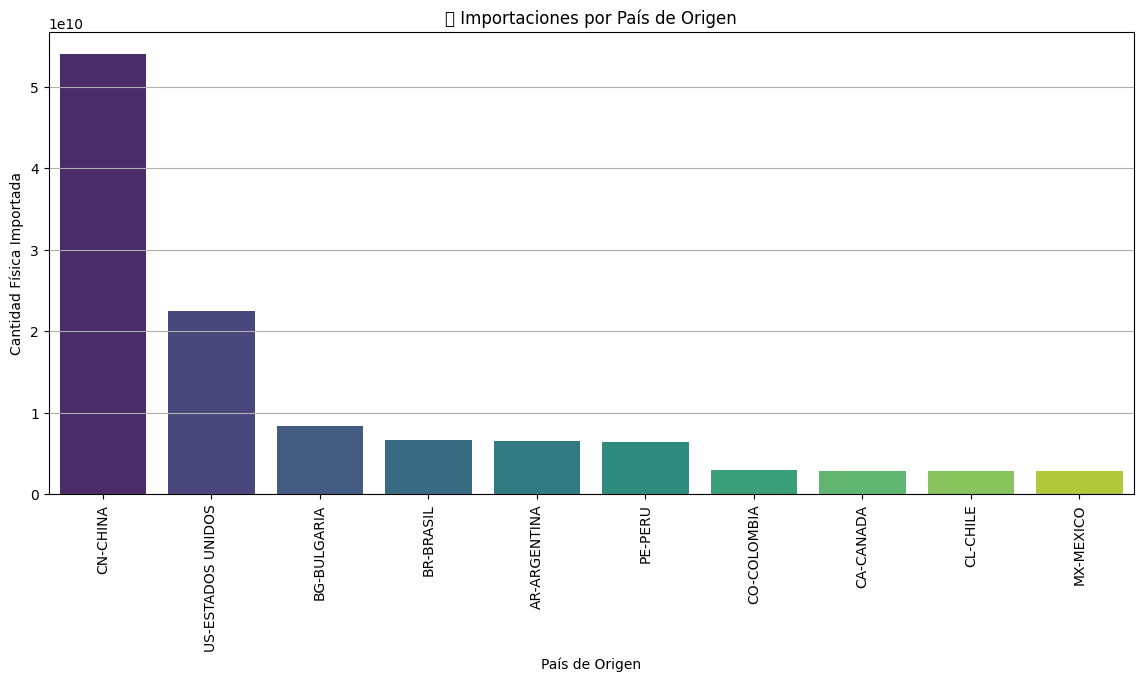

In [52]:
importaciones_por_pais = datos.groupby('PAIS_ORIGEN')['CANTIDAD_FISICA'].sum().sort_values(ascending=False)
top_paises = importaciones_por_pais.head(10)
# 📊 Gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(x=top_paises.index, y=top_paises.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("🌍 Importaciones por País de Origen")
plt.xlabel("País de Origen")
plt.ylabel("Cantidad Física Importada")
plt.grid(axis='y')
plt.show()

C:\Users\Josue\AppData\Local\Temp\ipykernel_14024\1694571910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importaciones_por_unidad.index, y=importaciones_por_unidad.values, palette="magma")
C:\Users\Josue\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


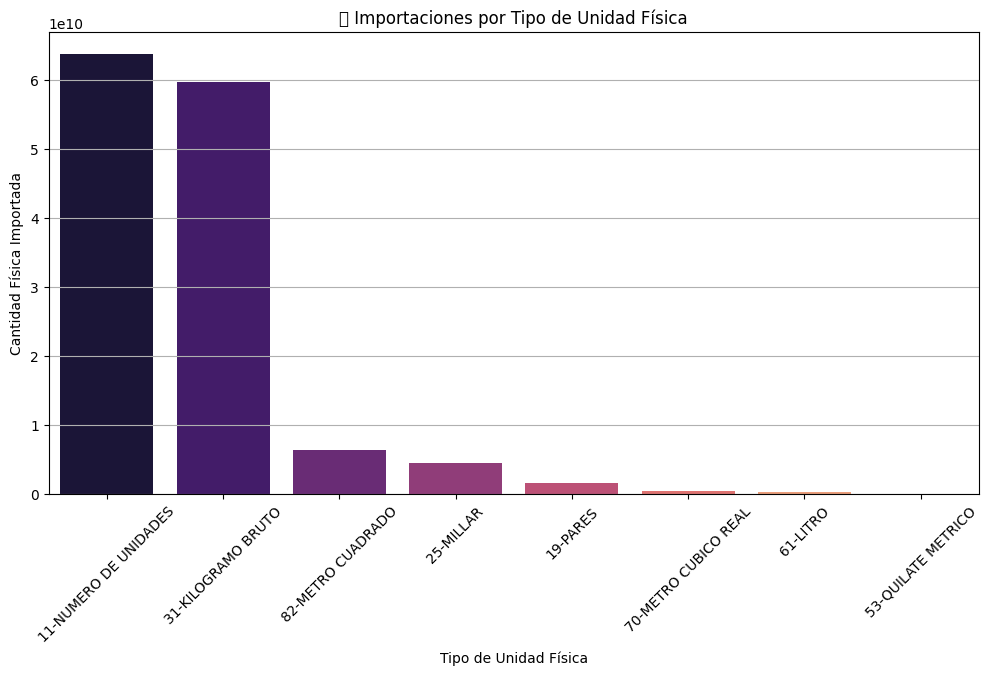

In [53]:
# 📊 Agrupar por tipo de unidad física y sumar la cantidad importada
importaciones_por_unidad = datos.groupby('TIPO_UNIDAD_FISICA')['CANTIDAD_FISICA'].sum().sort_values(ascending=False)

# 📊 Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=importaciones_por_unidad.index, y=importaciones_por_unidad.values, palette="magma")
plt.xticks(rotation=45)
plt.title("📦 Importaciones por Tipo de Unidad Física")
plt.xlabel("Tipo de Unidad Física")
plt.ylabel("Cantidad Física Importada")
plt.grid(axis='y')
plt.show()


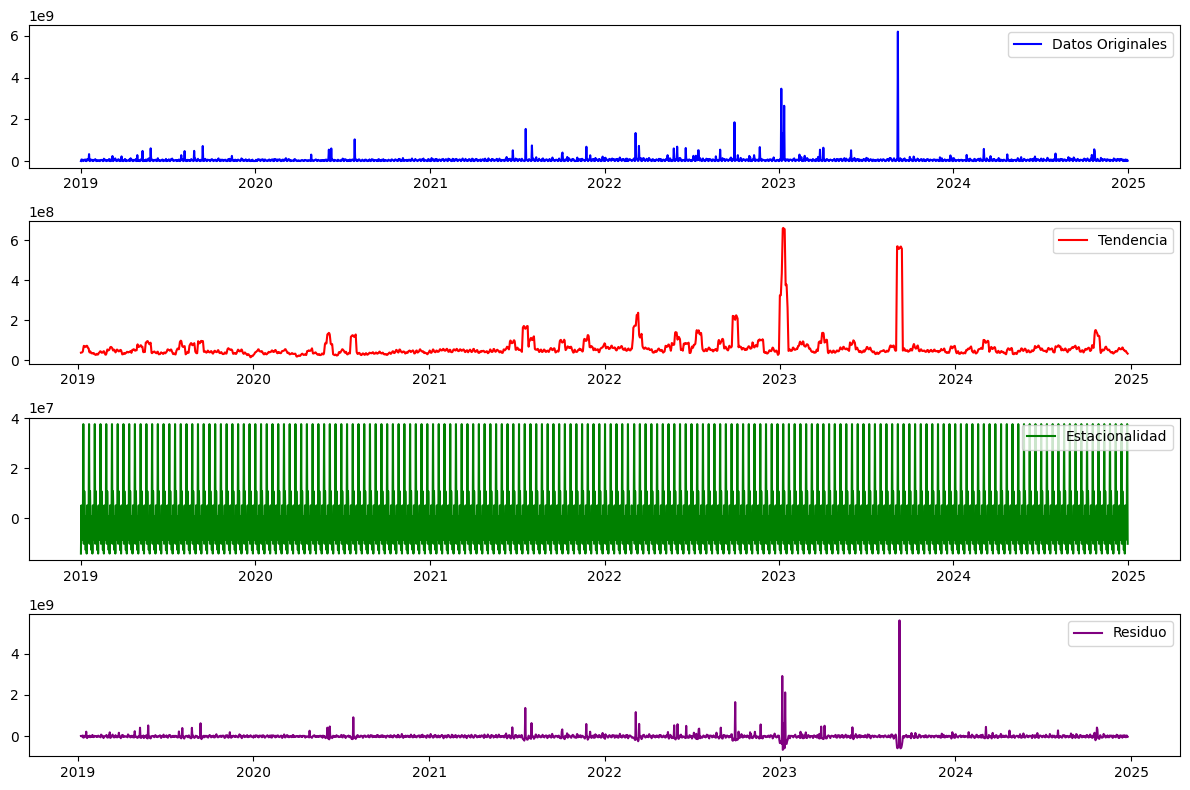

In [54]:


# 📈 Descomposición de la serie temporal (tendencia, estacionalidad, residuo)
descomposicion = sm.tsa.seasonal_decompose(importaciones_por_fecha, model='additive', period=12)

# 🎨 Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(importaciones_por_fecha, label='Datos Originales', color='blue')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(descomposicion.trend, label='Tendencia', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(descomposicion.seasonal, label='Estacionalidad', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(descomposicion.resid, label='Residuo', color='purple')
plt.legend()

plt.tight_layout()
plt.show()


# Deteccion de valores atipicos

C:\Users\Josue\AppData\Local\Temp\ipykernel_14024\905092757.py:25: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el espaciado entre subplots
C:\Users\Josue\AppData\Local\Temp\ipykernel_14024\905092757.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el espaciado entre subplots
C:\Users\Josue\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Josue\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


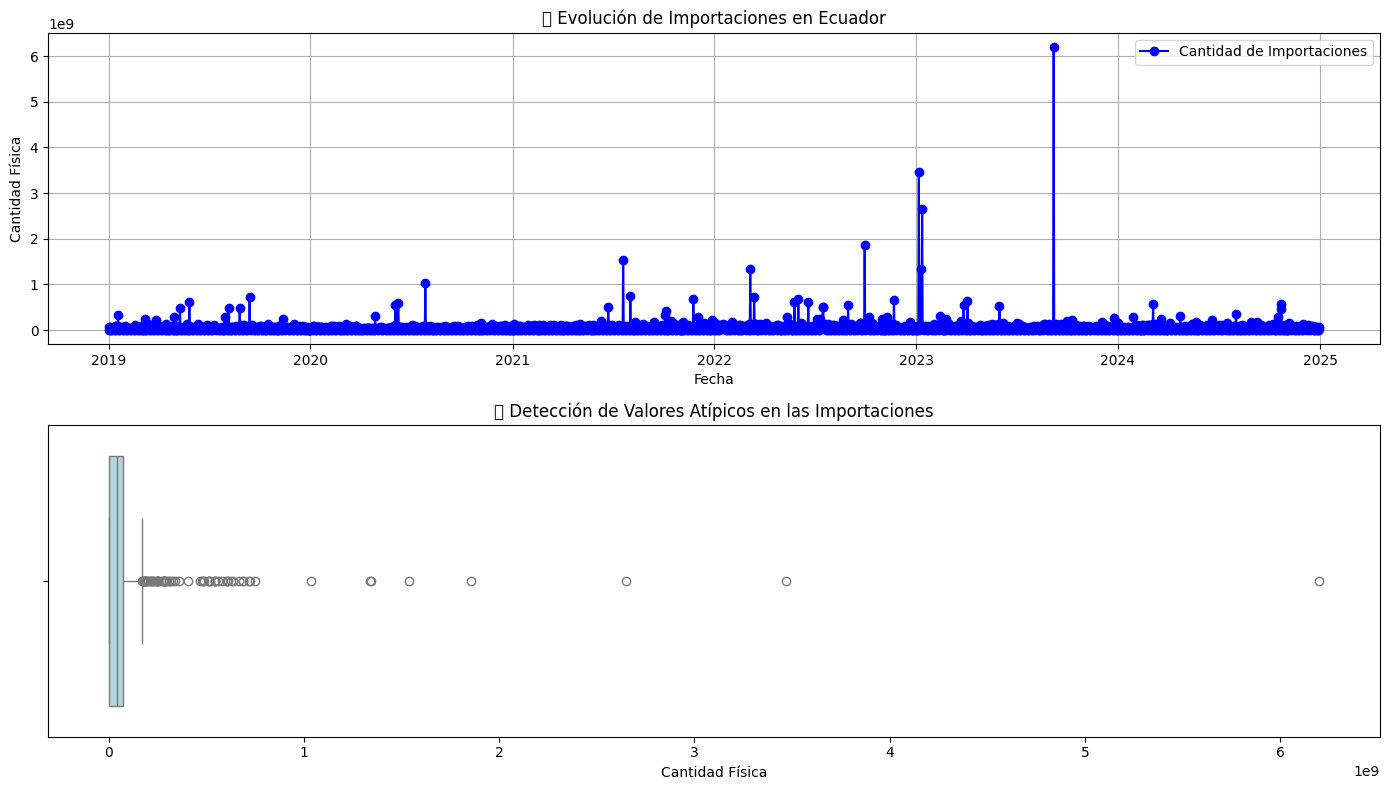

In [55]:
# Convertir la columna 'FEC_INGRESO' a tipo datetime
datos['FEC_INGRESO'] = pd.to_datetime(datos['FEC_INGRESO'])

# Agrupar por fecha y sumar la cantidad física de importaciones
importaciones_por_fecha = datos.groupby('FEC_INGRESO')['CANTIDAD_FISICA'].sum()

# Gráfico de la evolución de importaciones
plt.figure(figsize=(14, 8))

# Subplot 1: Evolución temporal de las importaciones
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, posición 1
plt.plot(importaciones_por_fecha, marker='o', linestyle='-', color='b', label="Cantidad de Importaciones")
plt.title("📦 Evolución de Importaciones en Ecuador")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Física")
plt.legend()
plt.grid()

# Subplot 2: Detección de valores atípicos usando un boxplot
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, posición 2
sns.boxplot(x=importaciones_por_fecha, orient='h', color='lightblue')
plt.title("📊 Detección de Valores Atípicos en las Importaciones")
plt.xlabel("Cantidad Física")

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()